In [95]:
header = ['Date','Tave','Tmax','Tmin','accumP','P','Psnowadj','SD','SWE','WS','WD','maxWS','Srad',
          'sm_2in','sm_8in','sm_20in','st_2in','st_8in','st_20in']

In [96]:
data = pd.read_csv('./data/quemazon_snotel/quemazon_snotel.csv', skiprows=8, names=header)
data.index = pd.DatetimeIndex(data['Date'])
del data['Date']

## Compute snowmelt from SWE

In [97]:
# compute snowmelt
sn1 = data.SWE.as_matrix()[:-1] # grab the first through the 2nd to last measurement
sn2 = data.SWE.as_matrix()[1:] # grab the second through the last measurement

sm = sn1-sn2 # compute melt
# add a nan to the end to shift the snowmelt to the correct position in the timeseries
sm = np.concatenate([sm,[np.NaN]]) 

data['snowmelt'] = sm # put the time series in the data frame

## Time shift the temperature data so it cooresponds with the day it was collected

In [98]:
header = list(data.columns)
tmp = pd.DataFrame(columns=header,index=[(data.index[0]-pd.datetools.timedelta(1))])
data = pd.concat([tmp,data])

cols = ['Tave','Tmin','Tmax']

for col in cols:
    data.ix[0:-1,col] = data.ix[1:,col] # scoot up the time series
    data.ix[-1,col] = np.NaN # make the last value nan

### QA/QC the snow depth data

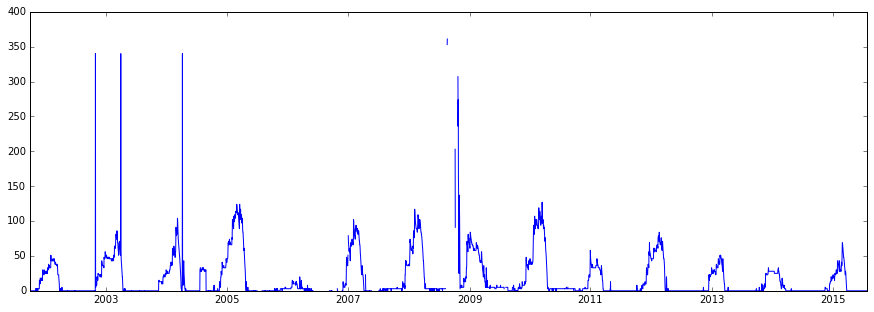

In [99]:
plt.figure(figsize=(15,5))
plt.plot(data.index,data.SD)

In [100]:
data.loc[data.SD>150,'SD'] = np.NaN # remove the large spikes

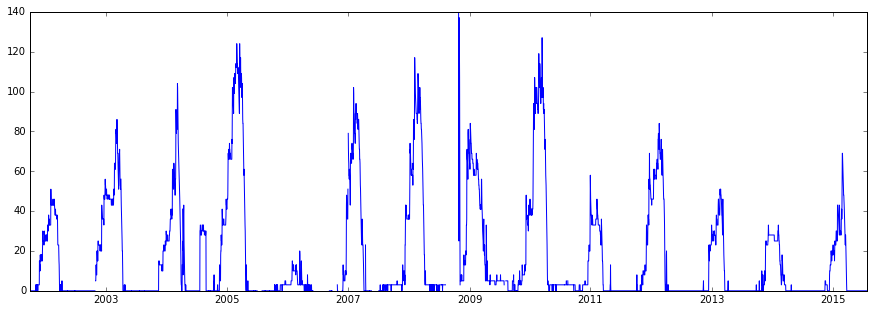

In [101]:
plt.figure(figsize=(15,5))
plt.plot(data.index,data.SD)

Looks like there are still some errors, especially the summer of 2004, and bad baseline for WYs 2007-2011.

## WY 2004

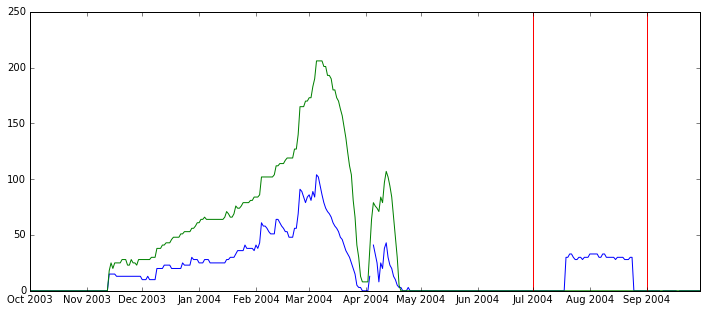

In [102]:
strt = '2003-10-1'
nd = '2004-9-30'
plt.figure(figsize=(12,5))
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SD'],label='Snow Depth')
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SWE'], label='SWE')
strt2 = '2004-7-1'
nd2 = '2004-9-1'
plt.axvline(strt2,c='r')
plt.axvline(nd2,c='r')


In [103]:
data.loc[strt2:nd2,'SD'] = np.NaN

## WY 2006

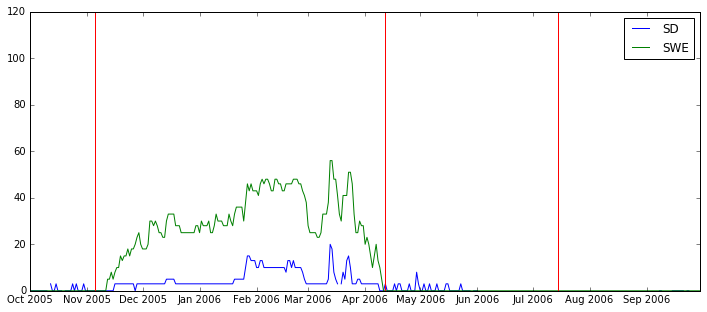

In [104]:
strt = '2005-10-1'
nd = '2006-9-30'
plt.figure(figsize=(12,5))
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SD'])
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SWE'])
strt2 = '2006-4-12'
nd2 = '2006-7-15'
plt.axvline(strt2,c='r')
plt.axvline(nd2,c='r')
nd3 = '2005-11-5'
plt.axvline(nd3,c='r')
plt.legend(loc = 'upper right')

In [105]:
data.loc[strt2:nd2,'SD'] = np.NaN
data.loc[strt:nd3,'SD'] = np.NaN

## WY 2007

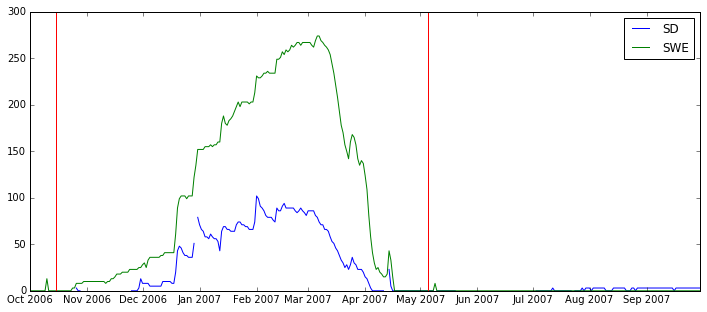

In [106]:
strt = '2006-10-1'
nd = '2007-9-30'
plt.figure(figsize=(12,5))
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SD'])
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SWE'])
strt2 = '2007-5-05'
nd2 = '2007-9-30'
plt.axvline(strt2,c='r')
plt.axvline(nd2,c='r')

nd3 = '2006-10-15'
plt.axvline(nd3,c='r')

plt.legend(loc = 'upper right')

In [107]:
data.loc[strt2:nd,'SD'] = np.NaN
data.loc[strt2:nd,'SWE'] = np.NaN
data.loc[strt:nd3,'SWE'] = np.NaN

## WY 2008

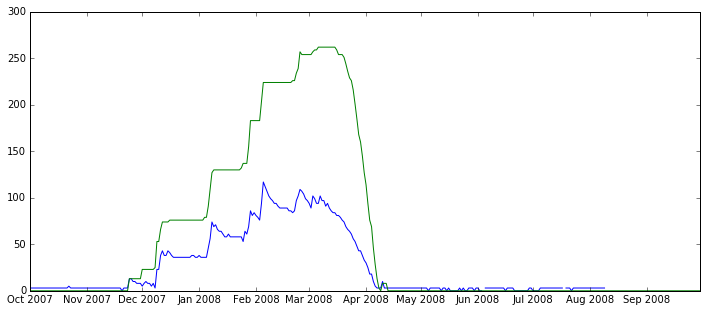

In [108]:
strt = '2007-10-1'
nd = '2008-9-30'
plt.figure(figsize=(12,5))
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SD'])
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SWE'])
plt.axhline(0, c = 'r')

In [109]:
data.loc[strt:nd,'SD'] = data.loc[strt:nd,'SD'] - 3.4 # remove the offset

In [110]:
data.loc[(data.index >= strt) & (data.index <= nd) & (data.SD < 0),'SD'] = np.NaN # 

## WY 2009

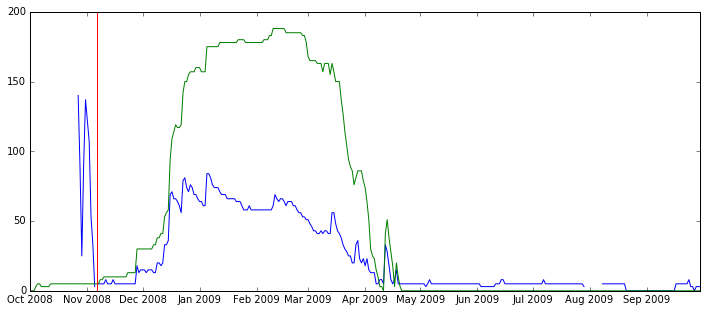

In [111]:
strt = '2008-10-1'
nd = '2009-9-30'
plt.figure(figsize=(12,5))
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SD'])
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SWE'])
plt.axhline(0, c = 'r')
plt.axvline('2008-11-6', c = 'r')

In [112]:
data.loc[strt:nd,'SD'] = data.loc[strt:nd,'SD'] - 5.5 # remove the offset

In [113]:
nd2 = '2008-11-6'
data.loc[strt:nd2,'SD'] = np.NaN

In [114]:
data.loc[(data.index >= strt) & (data.index <= nd) & (data.SD < 0),'SD'] = np.NaN # 

## WY 2010

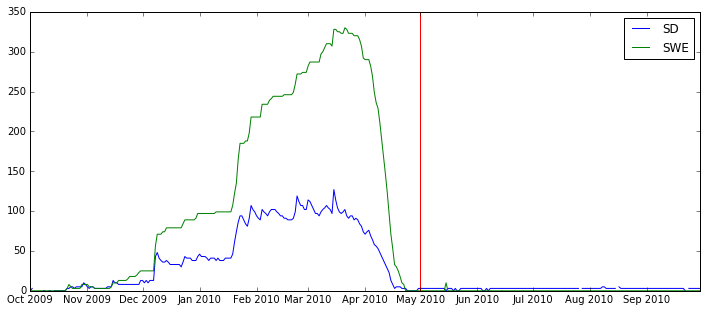

In [115]:
strt = '2009-10-1'
nd = '2010-9-30'
plt.figure(figsize=(12,5))
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SD'])
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SWE'])
strt2 = '2010-05-01'
plt.axvline(strt2,c='r')
plt.axhline(0, c = 'r')
plt.legend(loc='upper right')

In [116]:
data.loc[strt:nd,'SD'] = data.loc[strt:nd,'SD'] - 3.5 # remove the offset

In [117]:
data.loc[(data.index >= strt) & (data.index <= nd) & (data.SD < 0),'SD'] = np.NaN # 

In [118]:
data.loc[strt2:nd,'SWE'] = np.NaN

## WY 2011

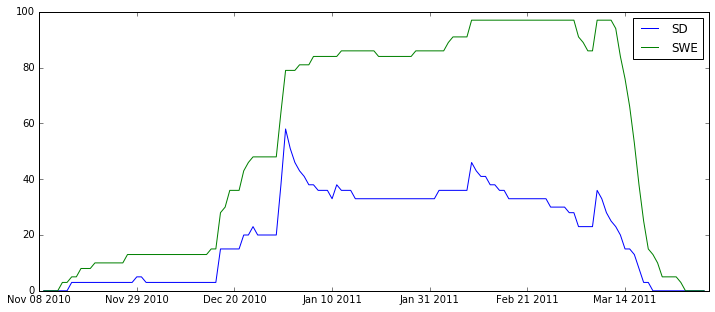

In [124]:
strt = '2010-10-1'
nd = '2011-9-30'
plt.figure(figsize=(12,5))
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SD'])
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SWE'])
nd2 = '2010-11-8'
strt2 = '2011-4-01'
plt.axvline(nd2,c='r')
plt.axvline(strt2,c='r')
#plt.axhline(0, c = 'r')
plt.legend(loc='upper right')

In [120]:
data.loc[strt:nd2,['SWE','SD']] = np.NaN

In [123]:
data.loc[strt2:nd,['SWE','SD']] = np.NaN

## Plot clean data

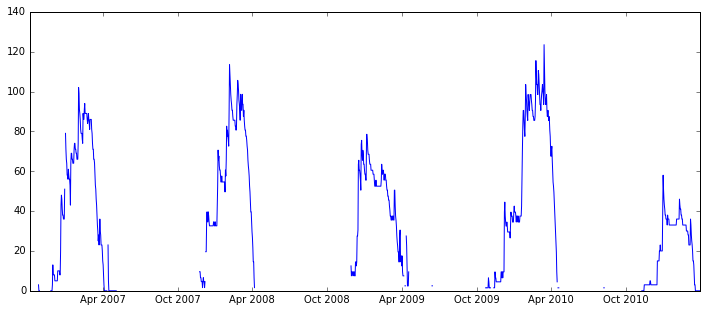

In [125]:
strt = '2006-10-1'
nd = '2011-9-30'
plt.figure(figsize=(12,5))
plt.plot(data.loc[strt:nd].index,data.loc[strt:nd,'SD'])

## Subset out the cleaned years

In [126]:
strt = '2006-10-1'
nd = '2011-9-30'
data2 = data.loc[strt:nd].copy()

## Compute Density for the subset

In [133]:
# run as apply, axis=1
def calcDensity(x):
    swe = x.SWE.copy() # pull SWE
    sd = x.SD.copy() # pull snow depth
    
    if np.isnan(sd) or np.isnan(swe):
        return np.NaN
    elif (swe < 5) or (sd < 10):
        return np.NaN
    else:
        rho_snow = 1000.*((swe*0.001)/(sd*0.01))
        if rho_snow > 475:
            rho_snow = np.NaN
        return rho_snow
        
    

In [134]:
data2['rho_snow'] = data2.apply(calcDensity,axis=1)

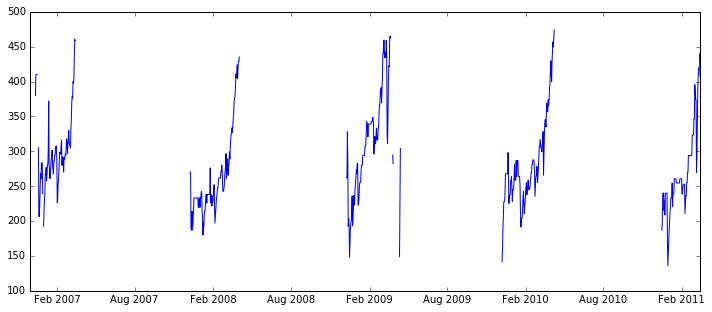

In [135]:
plt.figure(figsize=(12,5))
plt.plot(data2.loc[strt:nd].index,data2.loc[strt:nd,'rho_snow'])

## Save the data

In [28]:
data2.to_pickle('./data/quemazon_snotel_density.pcl')

In [29]:
data.to_pickle('./data/quemazon_snotel.pcl')